# Sheridan Kamal

## DATA 73500 - Assignment 3 (Due 3/9/20, 6:30p)

### Project
This project seeks to explore the hardship index from the city of Chicago.

### Data
Using data from the city of Chicago (https://data.cityofchicago.org/resource/kn9c-c2s2.json), I subsetted the data by removing the "ca" column and the last row, which I called chicago and was then used as a second dataframe after also removing the "hardship_index" column which had a NaN value. I then created a new variable called "hardship_index_prediction" by creating an OLS model and fitting the model to both of the subsetted dataframes. I also created a new variable called "percent_prediction_error" for the first dataframe by calculating the percent prediction error between the given "hardship_index" and the calculated "hardship_index_prediction".

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

data = pd.read_json('https://data.cityofchicago.org/resource/kn9c-c2s2.json')
data.head()

,ca,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
0,1.0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,2.0,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.0,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,4.0,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,5.0,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 9 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   ca                                           77 non-null     float64
 1   community_area_name                          78 non-null     object 
 2   percent_of_housing_crowded                   78 non-null     float64
 3   percent_households_below_poverty             78 non-null     float64
 4   percent_aged_16_unemployed                   78 non-null     float64
 5   percent_aged_25_without_high_school_diploma  78 non-null     float64
 6   percent_aged_under_18_or_over_64             78 non-null     float64
 7   per_capita_income_                           78 non-null     int64  
 8   hardship_index                               77 non-null     float64
dtypes: float64(7), int64(1), object(1)
memory usage: 5.6+ KB


Most of the variables are in their desired Dtypes. I could have converted "ca" and "hardship_index" to int 64, just because they are initially whole numbers and the decimal and following zero is unnecessary, but they both contain a null value and although I could coerce the Dtype to int64 the extra code necessary to do so really isn't needed.

In [3]:
chicago = data.loc[data['community_area_name'] == "CHICAGO"].iloc[:, 1:-1] #Remove "ca" and "hardship_index" columns
data = data.iloc[:-1, 1:] #Remove last row and "ca" column
data.tail()

,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
72,Washington Height,1.1,16.9,20.8,13.7,42.6,19713,48.0
73,Mount Greenwood,1.0,3.4,8.7,4.3,36.8,34381,16.0
74,Morgan Park,0.8,13.2,15.0,10.8,40.3,27149,30.0
75,O'Hare,3.6,15.4,7.1,10.9,30.3,25828,24.0
76,Edgewater,4.1,18.2,9.2,9.7,23.8,33385,19.0


In [4]:
data.mean()

percent_of_housing_crowded                         4.923377
percent_households_below_poverty                  21.766234
percent_aged_16_unemployed                        15.372727
percent_aged_25_without_high_school_diploma       20.341558
percent_aged_under_18_or_over_64                  35.746753
per_capita_income_                             25563.168831
hardship_index                                    49.506494
dtype: float64

In [5]:
data.corr()

,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index
percent_of_housing_crowded,1.000000,0.319336,0.165160,0.875953,0.224593,-0.541711,0.649574
percent_households_below_poverty,0.319336,1.000000,0.800046,0.424231,0.435537,-0.566851,0.803267
percent_aged_16_unemployed,0.165160,0.800046,1.000000,0.355474,0.676112,-0.656469,0.792294
percent_aged_25_without_high_school_diploma,0.875953,0.424231,0.355474,1.000000,0.408858,-0.709771,0.802538
percent_aged_under_18_or_over_64,0.224593,0.435537,0.676112,0.408858,1.000000,-0.754763,0.690844
per_capita_income_,-0.541711,-0.566851,-0.656469,-0.709771,-0.754763,1.000000,-0.849167
hardship_index,0.649574,0.803267,0.792294,0.802538,0.690844,-0.849167,1.000000


In [6]:
import statsmodels.formula.api as sm

result = sm.ols(formula = "hardship_index ~ percent_of_housing_crowded + percent_households_below_poverty + percent_aged_16_unemployed + percent_aged_25_without_high_school_diploma + percent_aged_under_18_or_over_64 + per_capita_income_", data = data, missing = 'drop').fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         hardship_index   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     586.6
Date:                Mon, 09 Mar 2020   Prob (F-statistic):           9.09e-58
Time:                        18:45:34   Log-Likelihood:                -215.62
No. Observations:                  77   AIC:                             445.2
Df Residuals:                      70   BIC:                             461.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================================================
                                                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Intercept                                     -24.4057      5.869     -4.159      0.000     -36.111     -12.701
percent_of_housing_crowded                      0.8356      0.292      2.857      0.006       0.252       1.419
percent_households_below_poverty                0.7711      0.077     10.022      0.000       0.618       0.925
percent_aged_16_unemployed                      0.8950      0.141      6.340      0.000       0.613       1.177
percent_aged_25_without_high_school_diploma     0.9183      0.103      8.876      0.000       0.712       1.125
percent_aged_under_18_or_over_64                0.6624      0.116      5.722      0.000       0.431       0.893
per_capita_income_                             -0.0001   6.78e-05     -1.790      0.078      -0.000    1.38e-05
==============================================================================
Omnibus:                       14.818   Durbin-Watson:                   1.685
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               31.596
Skew:                          -0.590   Prob(JB):                     1.38e-07
Kurtosis:                       5.908   Cond. No.                     3.67e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.67e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The p-value of the F-statistic is below 0.01 making this model significant at the 1% level. The model also has a high R-squared value meaning that 98% of the variance in "hardship_index" is explained by the model. Since the model is significant, we can use it to predict "hardship_index".

In [7]:
chicago['hardship_index_prediction'] = result.predict(chicago)
chicago

,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index_prediction
77,CHICAGO,4.7,19.7,12.9,19.5,33.5,28202,42.932447


Since Chicago had no value for "hardship_index" I decided to predict the value using the other provided information. The "hardship_index" is predicted to be ~43.

In [8]:
data['hardship_index_prediction'] = result.predict(data)
data['percent_prediction_error'] = ((data['hardship_index'] - data['hardship_index_prediction']) / data['hardship_index_prediction']) * 100
data

,community_area_name,percent_of_housing_crowded,percent_households_below_poverty,percent_aged_16_unemployed,percent_aged_25_without_high_school_diploma,percent_aged_under_18_or_over_64,per_capita_income_,hardship_index,hardship_index_prediction,percent_prediction_error
0,Rogers Park,7.7,23.6,8.7,18.2,27.5,23939,39.0,40.036559,-2.589031
1,West Ridge,7.8,17.2,8.8,20.8,38.5,23040,46.0,45.057077,2.092731
2,Uptown,3.8,24.0,8.9,11.8,22.2,35787,20.0,26.440707,-24.359058
3,Lincoln Square,3.4,10.9,8.2,13.4,25.5,37524,17.0,18.822897,-9.684466
4,North Center,0.3,7.5,5.2,4.5,26.2,57123,6.0,0.839561,614.659185
...,...,...,...,...,...,...,...,...,...,...
72,Washington Height,1.1,16.9,20.8,13.7,42.6,19713,48.0,46.566969,3.077356
73,Mount Greenwood,1.0,3.4,8.7,4.3,36.8,34381,16.0,10.991267,45.570109
74,Morgan Park,0.8,13.2,15.0,10.8,40.3,27149,30.0,33.183793,-9.594423
75,O'Hare,3.6,15.4,7.1,10.9,30.3,25828,24.0,23.777718,0.934832


In [9]:
data.to_csv('Chicago Data.csv', encoding='utf-8', index=False)

<IPython.core.display.Javascript object>


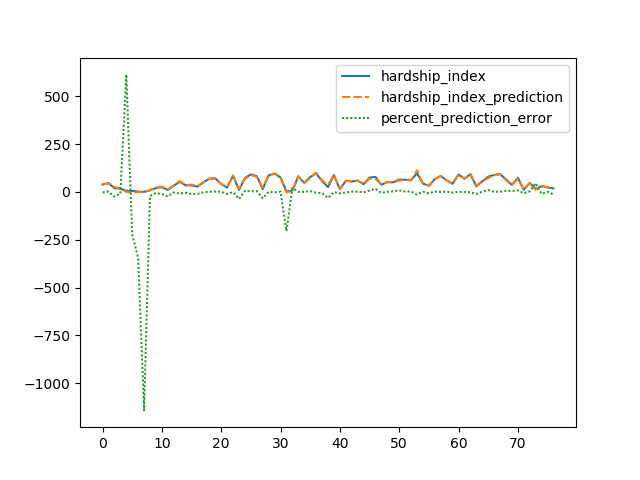

In [10]:
%matplotlib notebook
import seaborn as sns

data3 = data.iloc[:, 7:]

sns.lineplot(err_style=None, data=data3)

As we can see from the visualization above, the "hardship_index" and "hardship_index_prediction" are all seemingly close together. This is supported by the "percent_prediction_error", which is relatively stable around 0% with the notable exception of a few cities. As a next step, we could look into why certain cities had such a high prediction error (in either direction) and explore other factors not included in this dataset that could potentially affect "hardship_index" and in turn affect our prediction and prediction error.